In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from tensorflow import keras
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.callbacks import ModelCheckpoint
from keras.utils import pad_sequences, to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

def plot_loss_curves(history):

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(loss))

    fig, ax = plt.subplots(1, 2, figsize = (20, 5))

    # Plotting loss
    ax1 = sns.lineplot(x = epochs, y = loss, label='Training Loss', ax= ax[0])
    ax1 = sns.lineplot(x = epochs, y = val_loss, label='Validation Loss', ax= ax[0])
    ax1.set(title = 'Loss', xlabel = 'Epochs')

    # Plot accuracy
    ax2 = sns.lineplot(x = epochs, y = accuracy, label='Training Accuracy', ax= ax[1])
    ax2 = sns.lineplot(x = epochs, y = val_accuracy, label='Validation Accuracy', ax=ax[1])
    ax2.set(title = 'Accuracy', xlabel = 'Epochs')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/sentiment_data11.csv')

max_words = 5000
max_len = 200

In [ ]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df.Tweets)
sequences = tokenizer.texts_to_sequences(df.Tweets)
tweets = pad_sequences(sequences, maxlen=max_len)
labels = to_categorical(df.sentiment, num_classes=2)

X_train, X_test, y_train,y_test = train_test_split(tweets,labels,test_size=0.2,stratify=labels, random_state=13)

In [ ]:
model = keras.Sequential([
  layers.Embedding(max_words,40),
  layers.LSTM(40),
  layers.Dropout(0.5),
  layers.Dense(64, activation='relu'),
  layers.Dense(2,activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

checkpoint = ModelCheckpoint("/content/drive/MyDrive/best_model.hdf5",
                              monitor='val_accuracy',
                              verbose=1,
                              save_best_only=True,
                              mode='auto',
                              save_freq='epoch',
                              save_weights_only=False)

history = model.fit(X_train,y_train,
                    epochs=10,
                    validation_data=(X_test,y_test), 
                    callbacks=[checkpoint])

Epoch 1/10
540/540 [==============================] - ETA: 0s - loss: 0.1163 - accuracy: 0.9561
Epoch 1: val_accuracy improved from -inf to 0.99004, saving model to /content/drive/MyDrive/best_model2.hdf5
540/540 [==============================] - 87s 157ms/step - loss: 0.1163 - accuracy: 0.9561 - val_loss: 0.0322 - val_accuracy: 0.9900
Epoch 2/10
540/540 [==============================] - ETA: 0s - loss: 0.0402 - accuracy: 0.9895
Epoch 2: val_accuracy improved from 0.99004 to 0.99096, saving model to /content/drive/MyDrive/best_model2.hdf5
540/540 [==============================] - 75s 140ms/step - loss: 0.0402 - accuracy: 0.9895 - val_loss: 0.0296 - val_accuracy: 0.9910
Epoch 3/10
540/540 [==============================] - ETA: 0s - loss: 0.0240 - accuracy: 0.9930
Epoch 3: val_accuracy did not improve from 0.99096
540/540 [==============================] - 75s 139ms/step - loss: 0.0240 - accuracy: 0.9930 - val_loss: 0.0377 - val_accuracy: 0.9903
Epoch 4/10
540/540 [==================

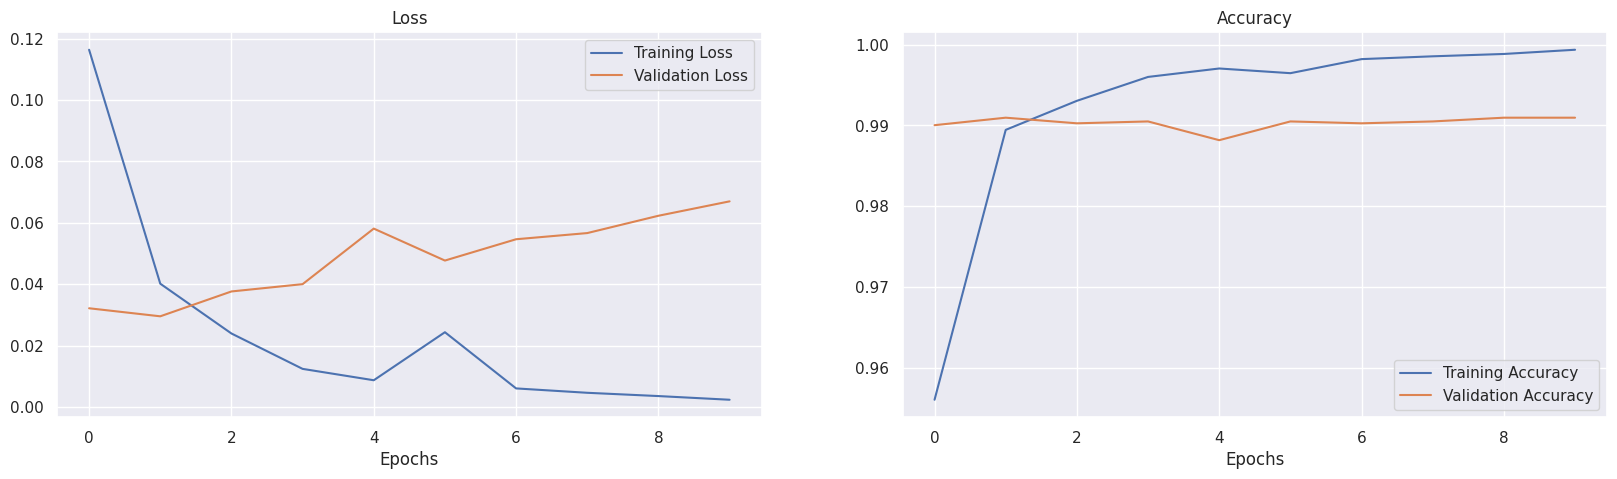

In [ ]:
plot_loss_curves(history)